# Bayankhongor - Air Quality Data Analysis
## Sumiya Ganbaatar
### Data Source: https://sites.wustl.edu/mongoliaproject/bkh-bam-data-update/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

#For interactive graphs
import pandas_bokeh
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row
from bokeh.io import output_file, show

#Matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import calplot

In [2]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

### Data Preperation for Data Analysis



In [3]:
#Importing the data
data = pd.read_csv("/Users/bayarmaaorsoo/Desktop/Breathe Mongolia/Data Analyses/Bayankhongor Data Analysis/BKH_BAM2022.txt")

In [4]:
data.head()

,Date/Time,Conc,Qtot,FT,AT,Status,RH,FRH,
0,2019/11/06 13:00,0.012,0.700,26.2,4.7,,0.37,12,
1,2019/11/06 14:00,0.011,0.701,26.5,5.2,,0.35,12,
2,2019/11/06 15:00,0.012,0.700,26.3,5.2,,0.35,12,
3,2019/11/06 16:00,0.015,0.700,26.2,4.9,,0.35,12,
4,2019/11/06 17:00,0.016,0.701,26.0,4.2,,0.37,12,


This sensors started gathering data on 6th of November, 2019. If want to analyze air quality, only pm2.5 data is available. 

### Data Transformation

In [5]:
#Dropping unnecessary columns
data = data.drop([' Qtot', ' FT', ' AT', ' Status', ' RH', ' FRH',
       '  '], axis = 1)


In [6]:
# Changing column name and unit
data = data.rename({' Conc': 'pm25'}, axis = 1)
data['pm25'] = data['pm25'] * 1000

In [7]:
#Changing data type
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Creating new columns based on date
data['year'] = pd.DatetimeIndex(data['Date/Time']).year
data['month'] = pd.DatetimeIndex(data['Date/Time']).month
data['day'] = pd.DatetimeIndex(data['Date/Time']).day
data['time'] = pd.DatetimeIndex(data['Date/Time']).hour

<AxesSubplot:xlabel='Date/Time'>

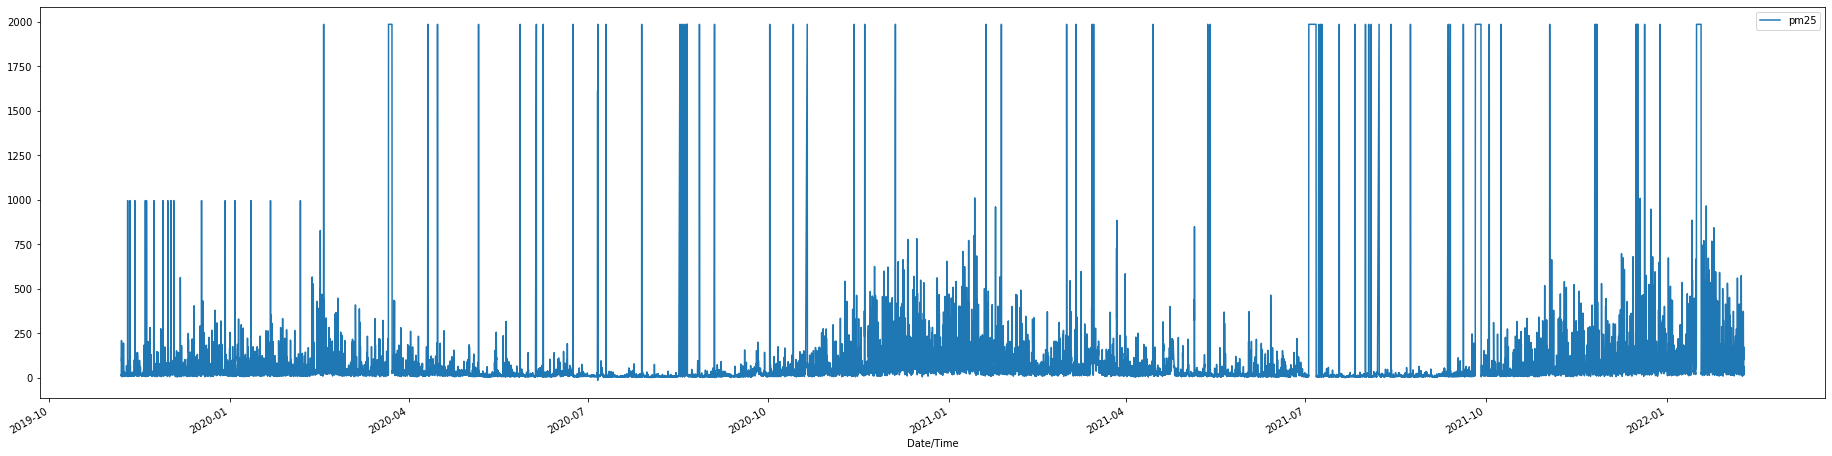

In [8]:
data.plot(x = 'Date/Time', y = 'pm25', figsize=(32, 8))

In [9]:
#Deleting outliers
#There are 283 rows where 'pm25' is equal to 1985. As the pm2.5 value is most likely to less than 1000, these rows will be deleted
data = data[data['pm25'] < 995]


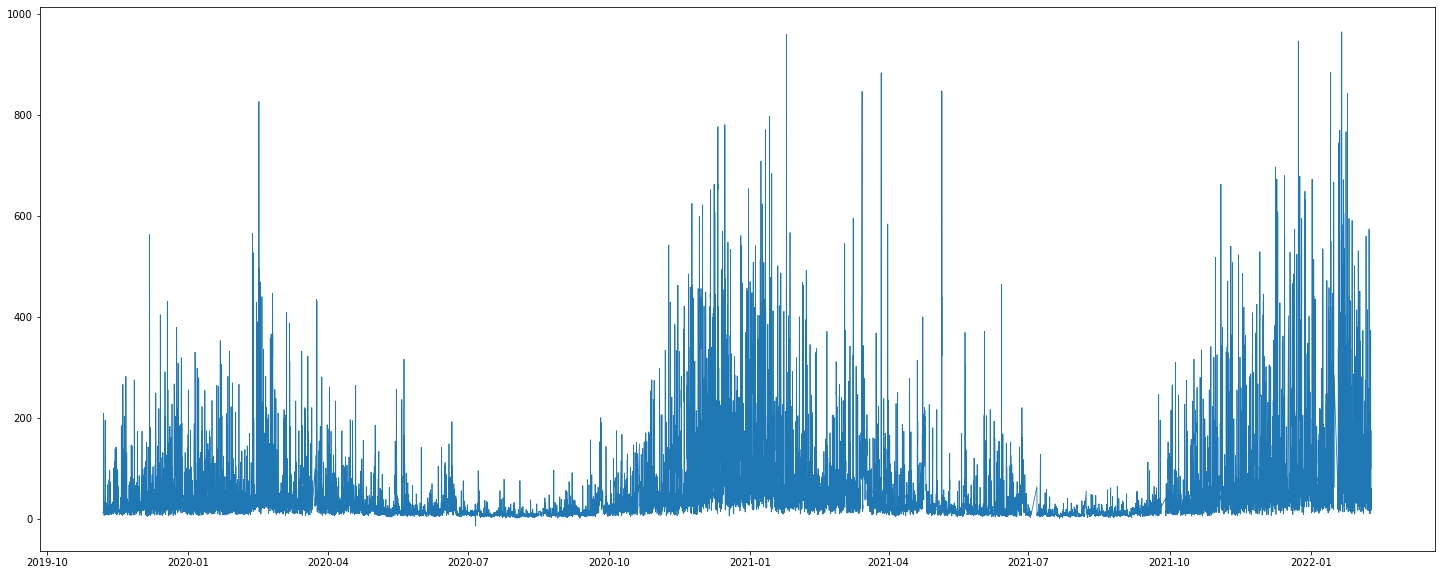

In [10]:
plt.figure(figsize=(25,10))
plt.plot(data['Date/Time'], data['pm25'], linewidth = 0.8)

Text(0.5, 1.0, 'Rolling 24 hours PM2.5 value in Bayankhongor')

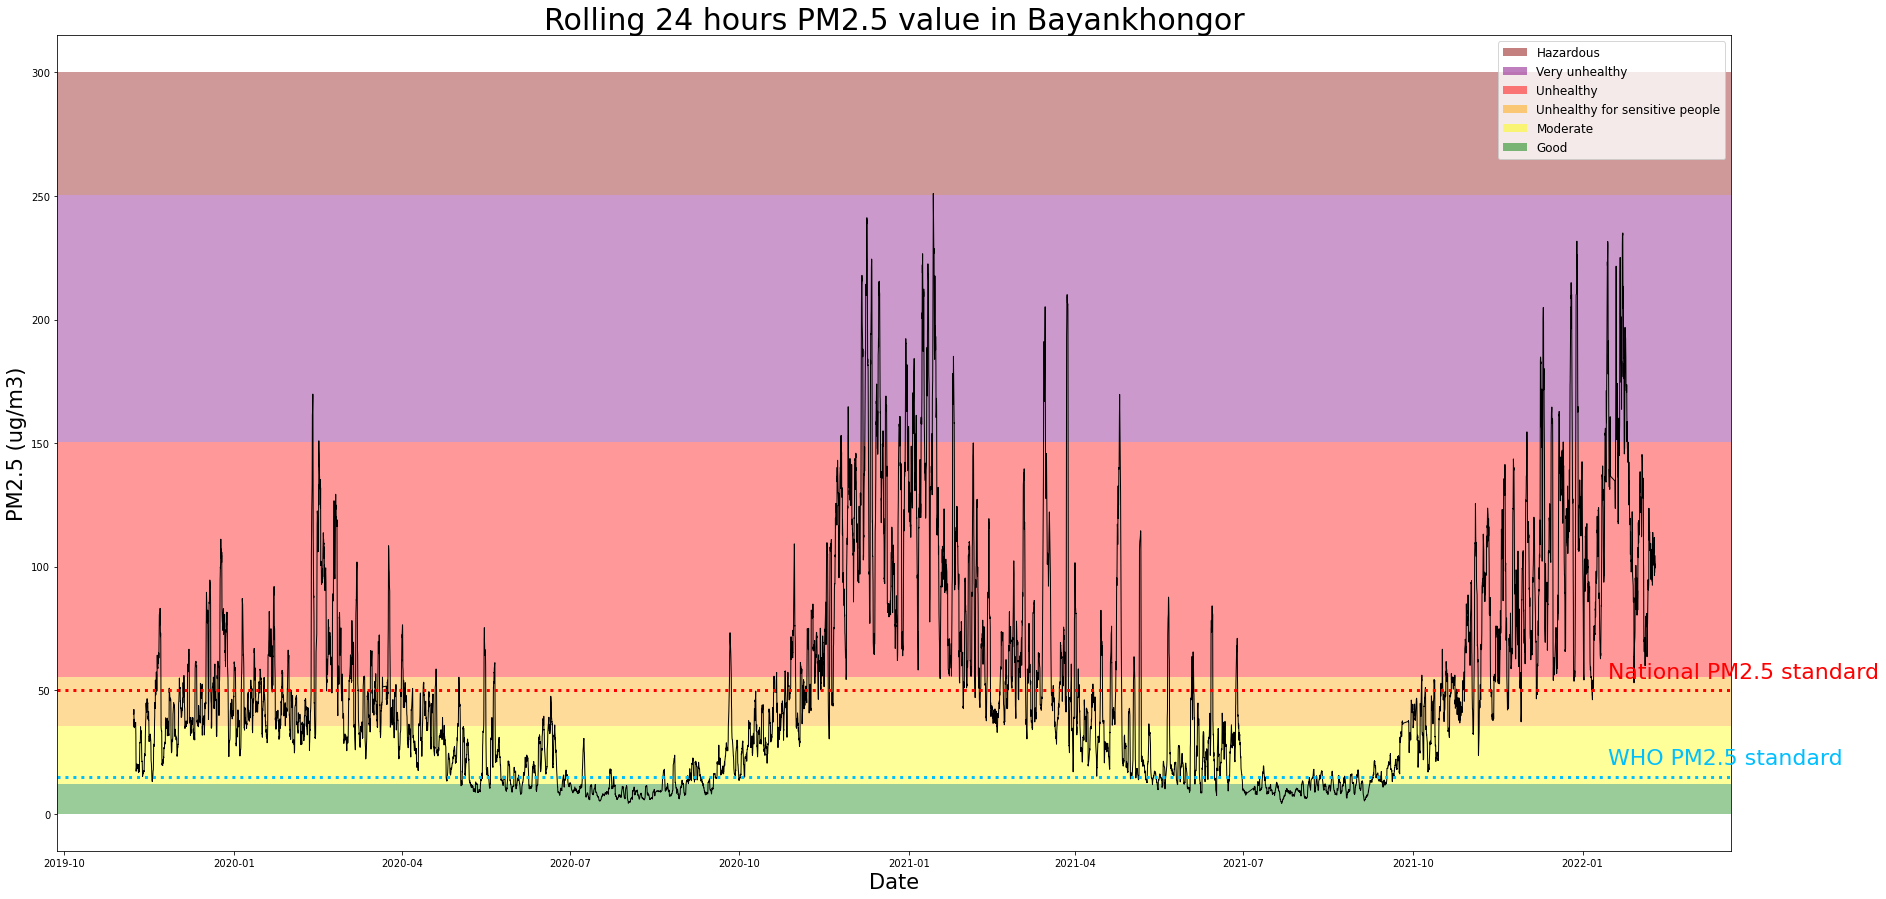

In [14]:
#Rolling 24 hours moving average
plt.figure(figsize=(30,15))
plt.plot(data['Date/Time'], data['pm25'].rolling(24).mean(), linewidth = 1, color ='black')



# WHO and National PM2.5 standards
plt.axhline(y=15, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='deepskyblue')

plt.axhline(y=50, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.5),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.5),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.5),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.5),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.5),
                  Patch(facecolor='green', label='Good', alpha = 0.5)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5 (ug/m3)', fontsize=21)
plt.title("Rolling 24 hours PM2.5 value in Bayankhongor", fontsize = 30)


Text(0.5, 1.0, 'Rolling 24 hours PM2.5 value in Bayankhongor')

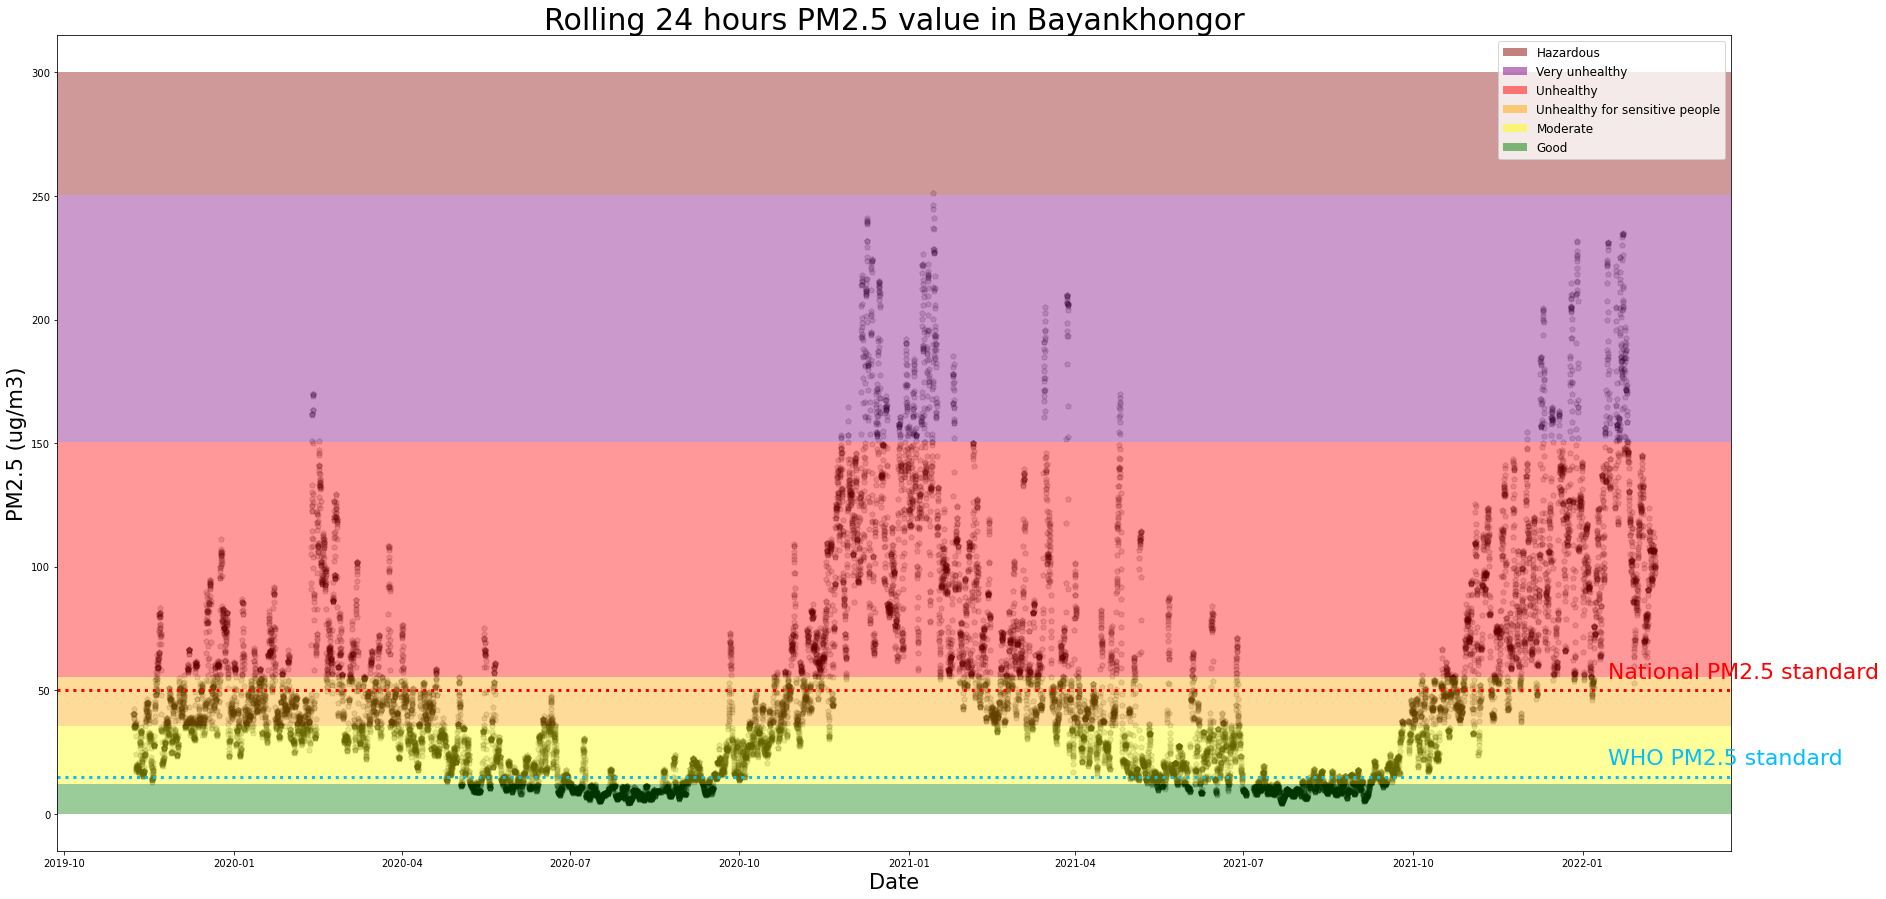

In [12]:
#Rolling 24 hours moving average
plt.figure(figsize=(30,15))
plt.scatter(data['Date/Time'], data['pm25'].rolling(24).mean(), alpha = 0.15, marker = 'p', color = 'black')



# WHO and National PM2.5 standards
plt.axhline(y=15, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='deepskyblue')

plt.axhline(y=50, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.5),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.5),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.5),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.5),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.5),
                  Patch(facecolor='green', label='Good', alpha = 0.5)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5 (ug/m3)', fontsize=21)
plt.title("Rolling 24 hours PM2.5 value in Bayankhongor", fontsize = 30)

Text(0.5, 1.0, 'Rolling 48 hours PM2.5 value in Bayankhongor')

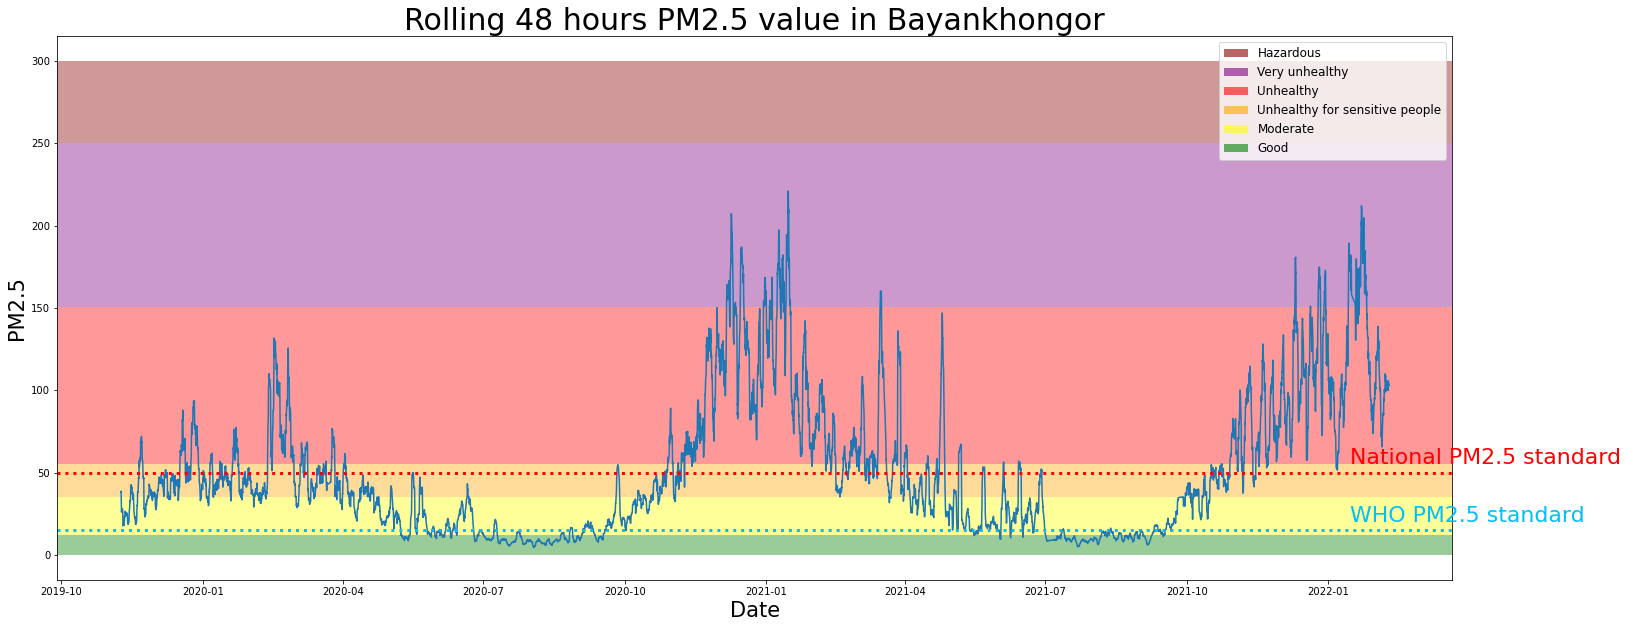

In [13]:
#Rolling 48 hours moving average
plt.figure(figsize=(25,10))
plt.plot(data['Date/Time'], data['pm25'].rolling(48).mean())


# WHO and National PM2.5 standards
plt.axhline(y=15, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='deepskyblue')

plt.axhline(y=50, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.6),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.6),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.6),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.6),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.6),
                  Patch(facecolor='green', label='Good', alpha = 0.6)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5', fontsize=21)
plt.title("Rolling 48 hours PM2.5 value in Bayankhongor", fontsize = 30)


Text(0.5, 1.0, 'Rolling 48 hours PM2.5 value in Bayankhongor')

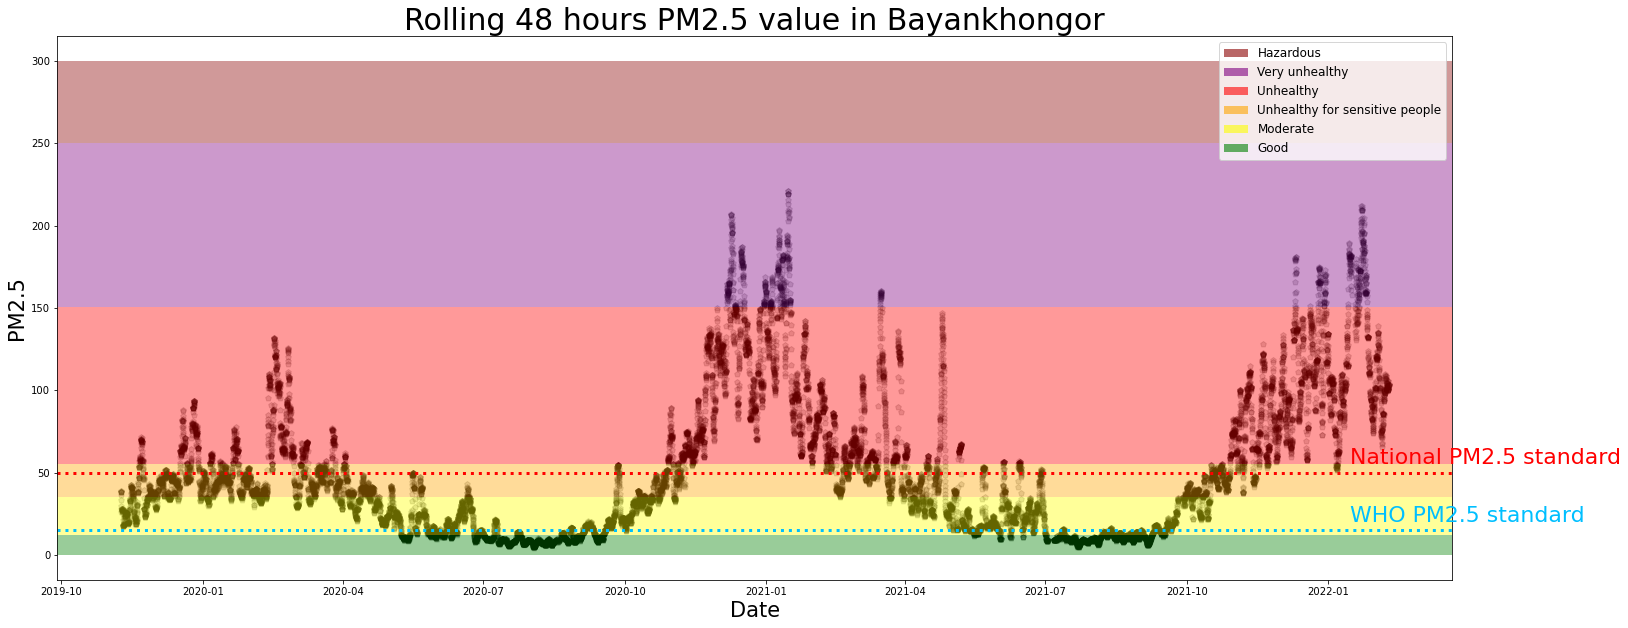

In [15]:
#Rolling 48 hours moving average
plt.figure(figsize=(25,10))
plt.scatter(data['Date/Time'], data['pm25'].rolling(48).mean(), alpha = 0.15, marker = 'p', color = 'black' )


# WHO and National PM2.5 standards
plt.axhline(y=15, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='deepskyblue')

plt.axhline(y=50, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.6),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.6),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.6),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.6),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.6),
                  Patch(facecolor='green', label='Good', alpha = 0.6)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5', fontsize=21)
plt.title("Rolling 48 hours PM2.5 value in Bayankhongor", fontsize = 30)


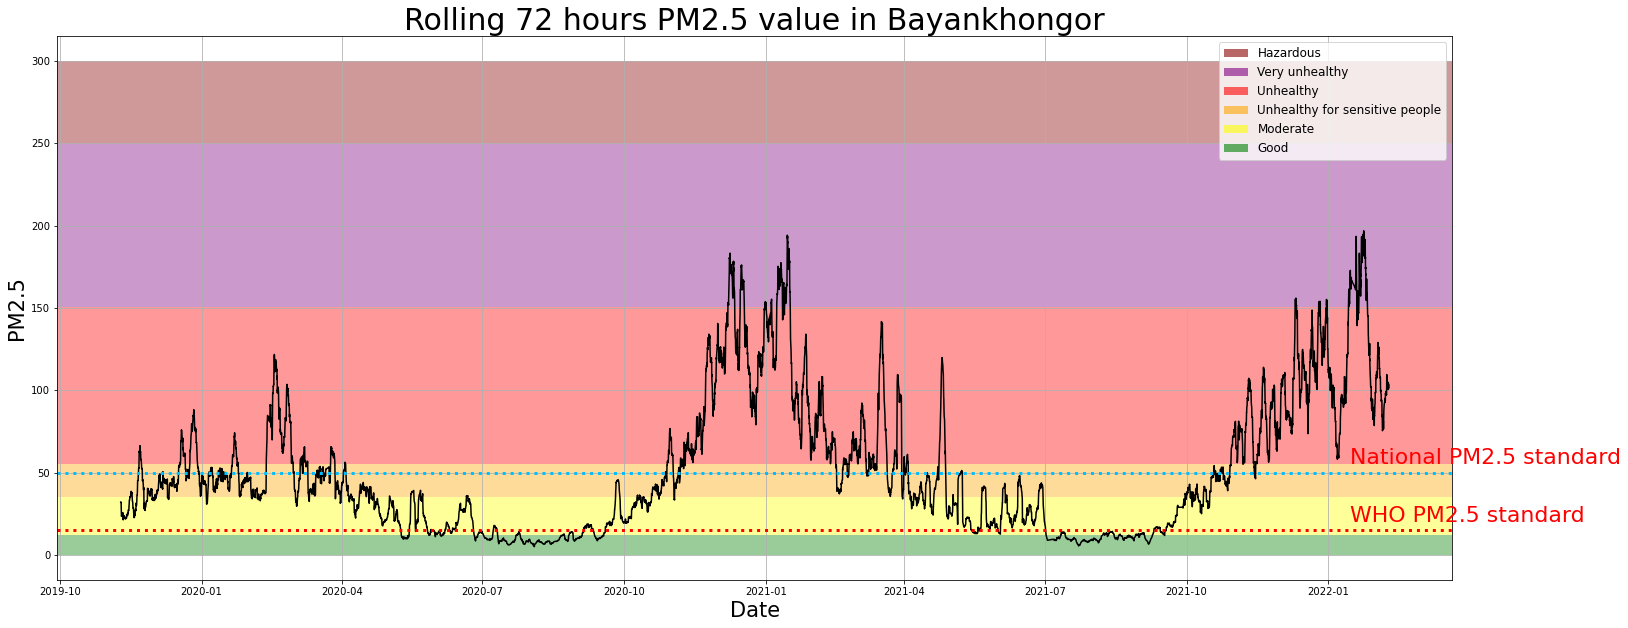

In [17]:
#Rolling 72 hours moving average
plt.figure(figsize=(25,10))
plt.plot(data['Date/Time'], data['pm25'].rolling(72).mean(), color = 'black')



# WHO and National PM2.5 standards
plt.axhline(y=15, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')

plt.axhline(y=50, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.6),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.6),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.6),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.6),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.6),
                  Patch(facecolor='green', label='Good', alpha = 0.6)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5', fontsize=21)
plt.title("Rolling 72 hours PM2.5 value in Bayankhongor", fontsize = 30)



Text(0.5, 1.0, 'Rolling 72 hours PM2.5 value in Bayankhongor')

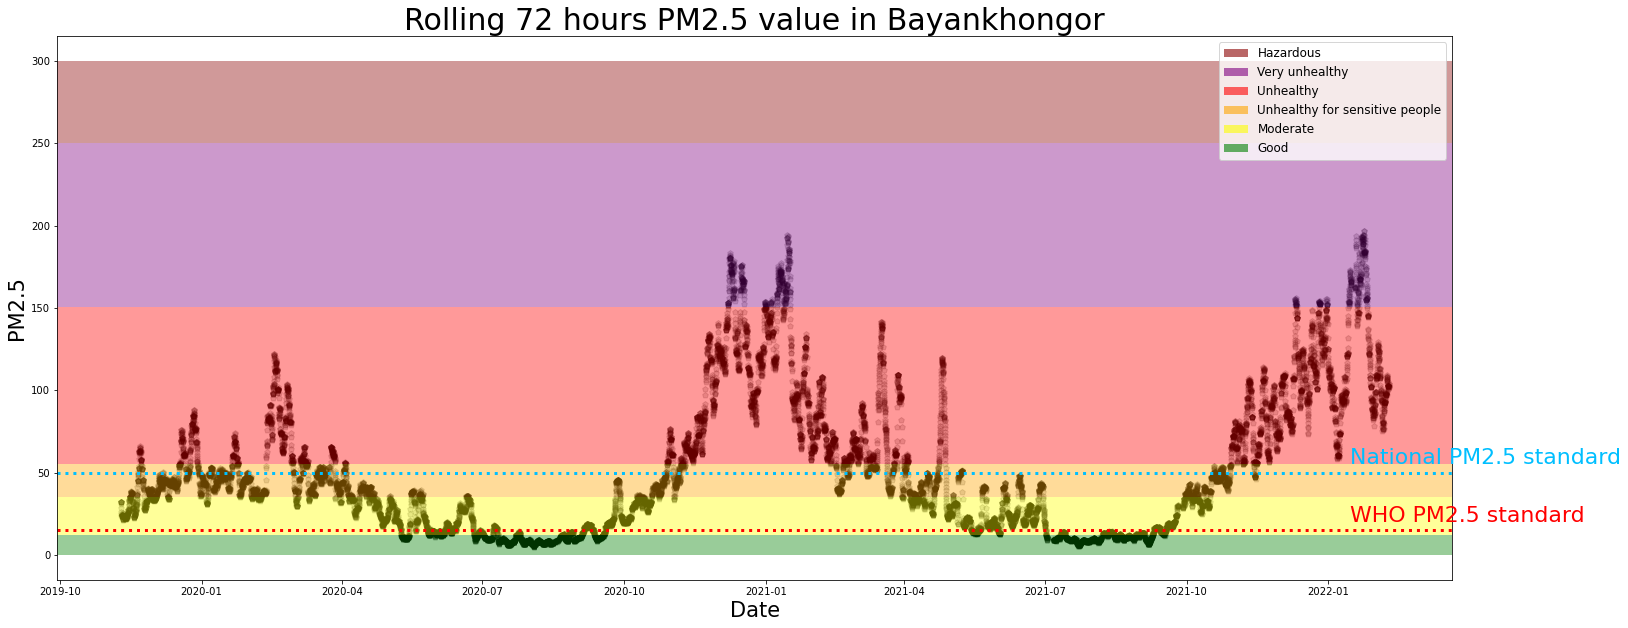

In [29]:
#Rolling 72 hours moving average
plt.figure(figsize=(25,10))
plt.scatter(data['Date/Time'], data['pm25'].rolling(72).mean(), alpha = 0.15, marker = 'p', color = 'black')



# WHO and National PM2.5 standards
plt.axhline(y=15, color='r', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')

plt.axhline(y=50, color='deepskyblue', linestyle='dotted', linewidth = 3)
plt.text(pd.Timestamp('2022-01-15'), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='deepskyblue')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.6),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.6),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.6),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.6),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.6),
                  Patch(facecolor='green', label='Good', alpha = 0.6)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5', fontsize=21)
plt.title("Rolling 72 hours PM2.5 value in Bayankhongor", fontsize = 30)

Text(0.5, 1.0, 'Daily average PM2.5 value in Bayankhongor')

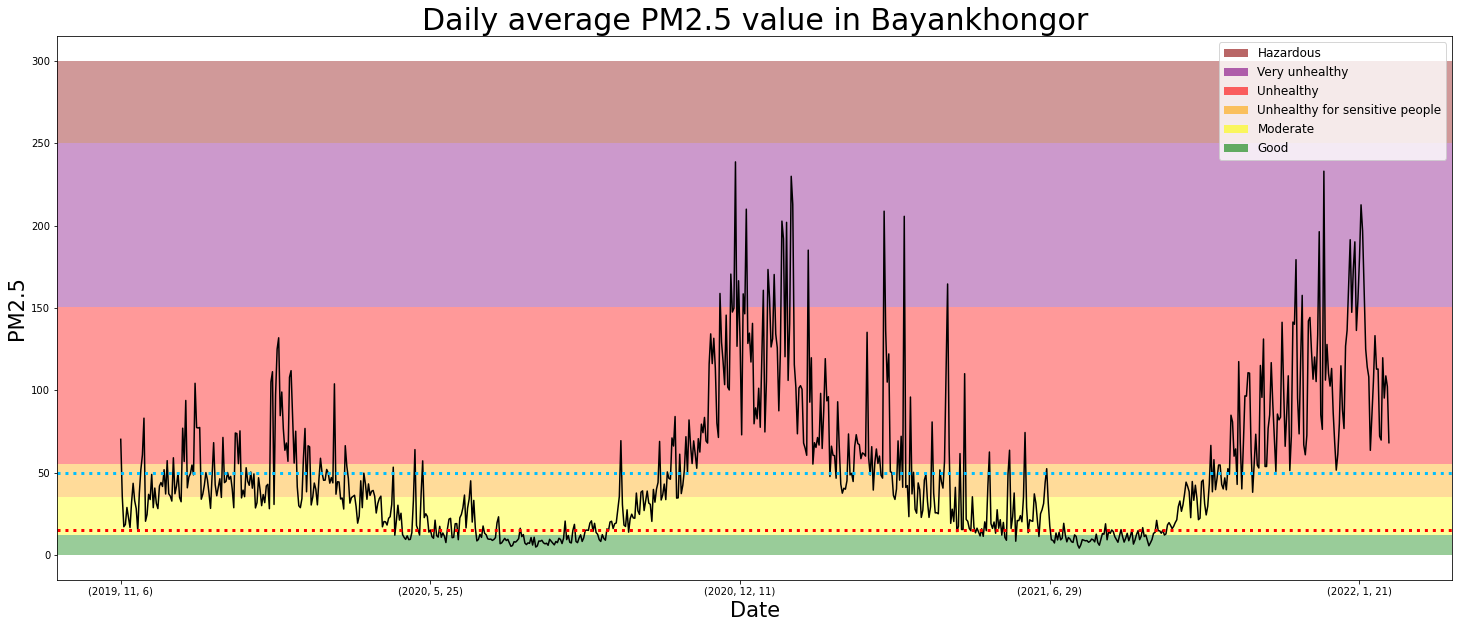

In [31]:
#Daily average graph

data[['pm25','year', 'month','day']].groupby(['year','month','day']).mean().plot(figsize = (25,10), color ='black')


# WHO and National PM2.5 standards
plt.axhline(y=15, color='r', linestyle='dotted', linewidth = 3)
#plt.text(pd.Datetime(2019, 11, 6), 20, "WHO PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')

plt.axhline(y=50, color='deepskyblue', linestyle='dotted', linewidth = 3)
#plt.text(pd.Datetime(2019, 11, 6), 55, "National PM2.5 standard", horizontalalignment='left', fontsize=22, color='red')


#Legends
legend_elements = [Patch(facecolor='darkred', label='Hazardous', alpha = 0.6),
                  Patch(facecolor='purple', label='Very unhealthy', alpha = 0.6),
                  Patch(facecolor='red', label='Unhealthy', alpha = 0.6),
                  Patch(facecolor='orange', label='Unhealthy for sensitive people', alpha = 0.6),
                  Patch(facecolor='yellow', label='Moderate', alpha = 0.6),
                  Patch(facecolor='green', label='Good', alpha = 0.6)]

plt.legend(handles=legend_elements, loc='upper right', fontsize = 12)

#AQI category
plt.axhspan(0, 12, facecolor='green', alpha=0.4)
plt.axhspan(12, 35.4, facecolor='yellow', alpha=0.4)
plt.axhspan(35.4, 55.4, facecolor='orange', alpha=0.4)
plt.axhspan(55.4, 150.4, facecolor='red', alpha=0.4)
plt.axhspan(150.4, 250.4, facecolor='purple', alpha=0.4)
plt.axhspan(250.4, 300, facecolor='darkred', alpha=0.4)

#Label
plt.xlabel('Date', fontsize=21)
plt.ylabel('PM2.5', fontsize=21)
plt.title("Daily average PM2.5 value in Bayankhongor", fontsize = 30)

In [24]:
data[['pm25','year', 'month','day']].groupby(['year','month','day']).mean()

pm25
year month day            
2019 11    6     70.272727
           7     35.458333
           8     17.208333
           9     18.583333
           10    28.913043
...                    ...
2022 2     5    119.791667
           6     95.333333
           7    108.791667
           8    102.291667
           9     68.222222

[820 rows x 1 columns]

In [32]:
gb1 = data[['pm25','year', 'month','day']].groupby(['year','month','day']).mean()

<AxesSubplot:xlabel='year,month'>

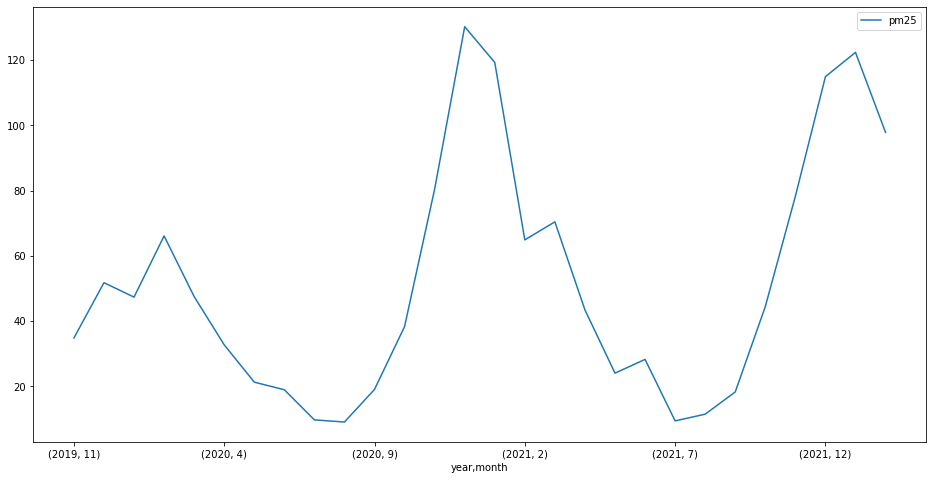

In [34]:
# Monthly average graph
data[['pm25','year', 'month']].groupby(['year','month']).mean().plot(figsize= (16,8))

<AxesSubplot:xlabel='year'>

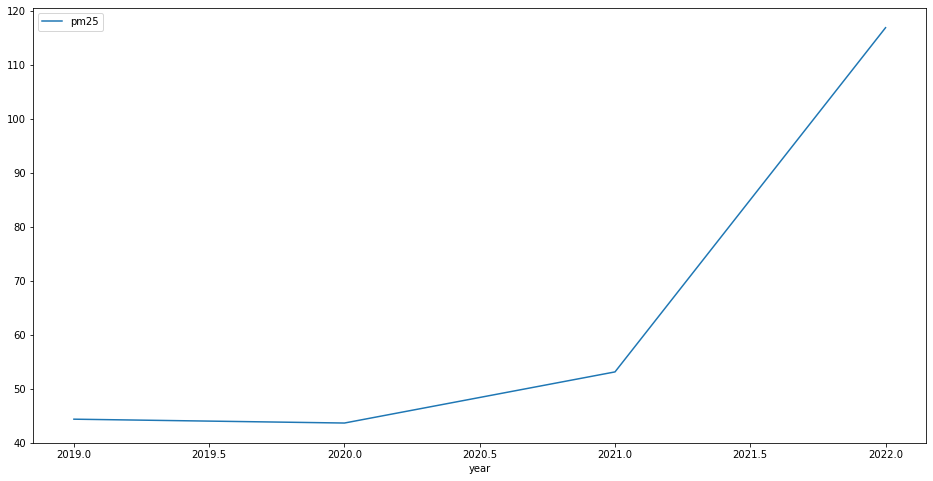

In [35]:
# Yearly average graph
# This graph can be misleading because 2022 data only includes January data whereas other years include summer data
data[['pm25','year']].groupby(['year']).mean().plot(figsize= (16,8))

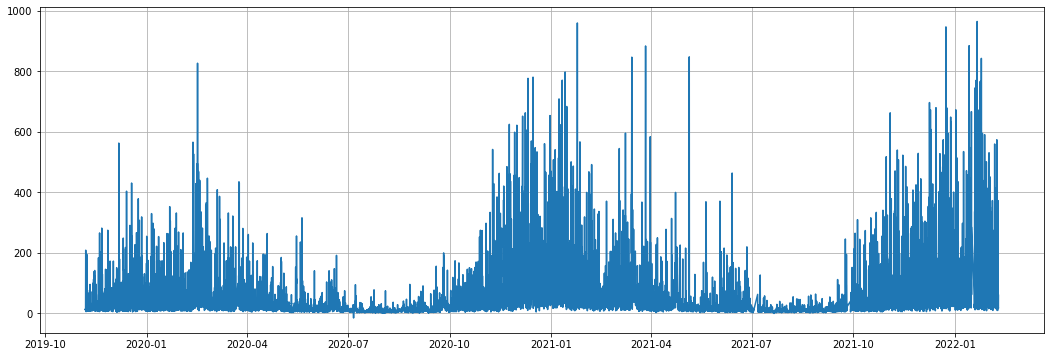

<Figure size 1296x1152 with 0 Axes>

In [36]:
plt.figure(figsize=(18, 6))
plt.plot(data['Date/Time'], data['pm25'])
plt.grid(True)
plt.figure(figsize=(18, 16))
plt.show()

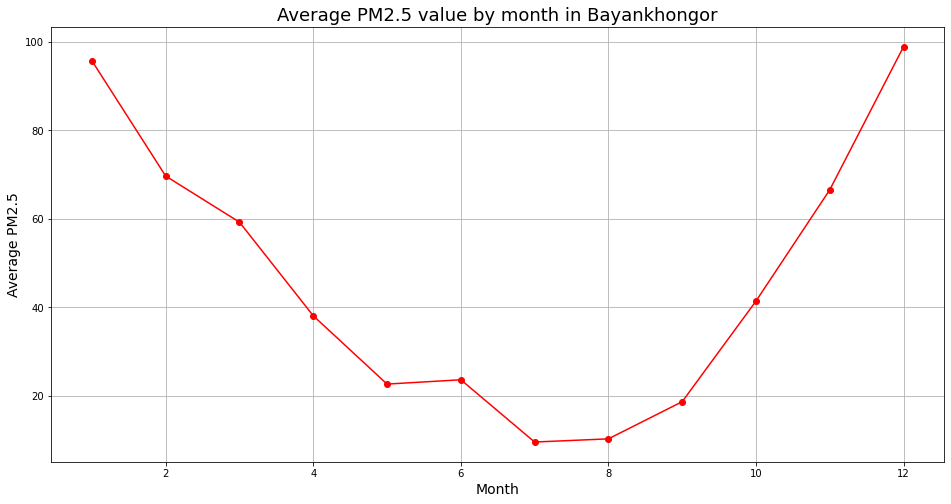

In [37]:
# PM2.5 by month
plt.figure(figsize=(16, 8))
plt.plot(data[['pm25','month']].groupby(['month']).mean(), marker='o', color = 'red')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.title("Average PM2.5 value by month in Bayankhongor", fontsize = 18)
plt.grid(True)


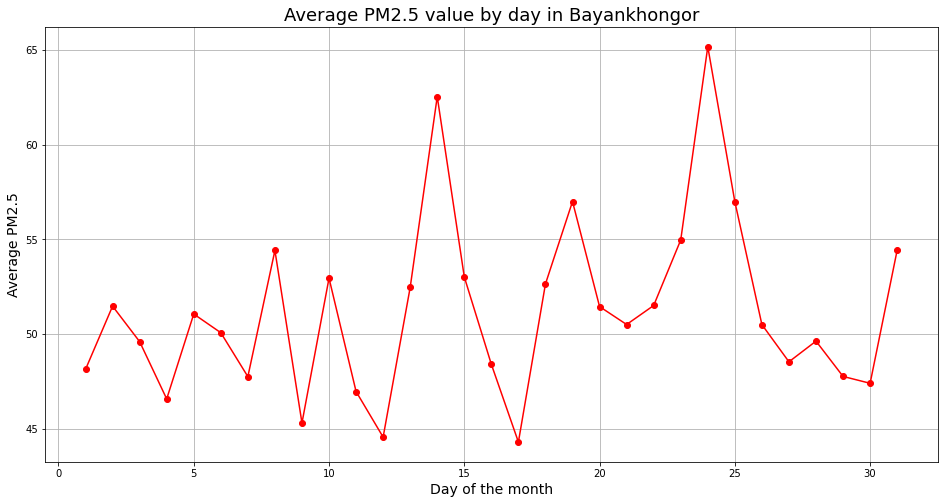

In [38]:
# PM2.5 by month
plt.figure(figsize=(16, 8))
plt.plot(data[['pm25','day']].groupby(['day']).mean(), marker='o', color = 'red')
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.title("Average PM2.5 value by day in Bayankhongor", fontsize = 18)
plt.grid(True)

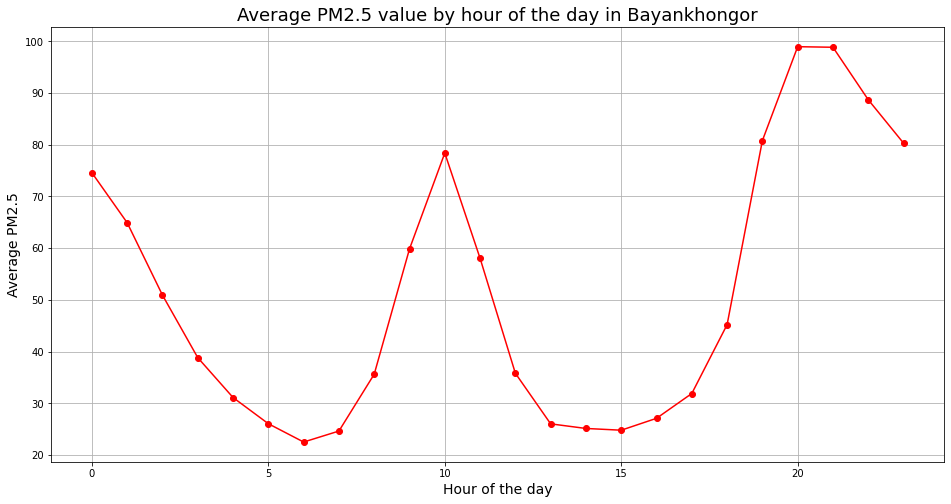

In [39]:
# PM2.5 by hour
plt.figure(figsize=(16, 8))
plt.plot(data[['pm25','time']].groupby(['time']).mean(), marker='o', color = 'red')
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.title("Average PM2.5 value by hour of the day in Bayankhongor", fontsize = 18)
plt.grid(True)

In [40]:
data2019 = data[data.year == 2019]
data2020 = data[data.year == 2020]
data2021 = data[data.year == 2021]
data2022 = data[data.year == 2022]

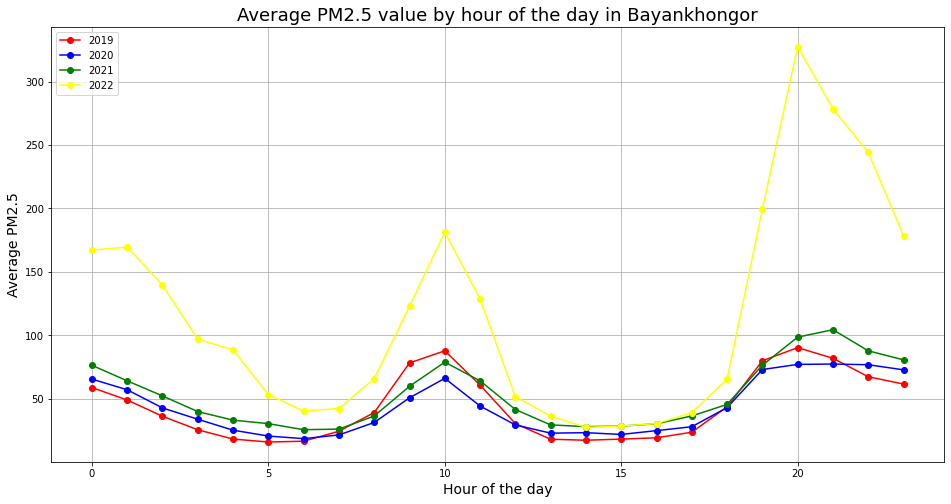

In [41]:
# PM2.5 by hour
plt.figure(figsize=(16, 8))
plt.plot(data2019[['pm25','time']].groupby(['time']).mean(), marker='o', color = 'red', label="2019")
plt.plot(data2020[['pm25','time']].groupby(['time']).mean(), marker='o', color = 'blue', label="2020")
plt.plot(data2021[['pm25','time']].groupby(['time']).mean(), marker='o', color = 'green', label="2021")
plt.plot(data2022[['pm25','time']].groupby(['time']).mean(), marker='o', color = 'yellow', label="2022")
plt.xlabel('Hour of the day', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.title("Average PM2.5 value by hour of the day in Bayankhongor", fontsize = 18)
plt.legend(loc="upper left")
plt.grid(True)

In [42]:
data[['pm25','time']].groupby(['time']).mean().plot_bokeh.line(
    figsize=(800, 450),
    title="Hourly average PM2.5 value in Bayankhongor",
    xlabel="Hour of the day",
    ylabel="PM2.5",
    marker="asterisk",
    plot_data_points = True)


Figure(id='1003', ...)

In [43]:
data['pm25'].mean()


51.221784232365145

In [44]:
data2022['pm25'].mean()

116.84572072072072

Average since Nov 2019 = 48.76
2019 average = 44.35
2020 average = 43.64
2021 average = 53.11
2022 average = 92.98
Nov 2019 - Apr 2020 average = 47.05
2020 Oct - 2021 Apr average = 78.63
Since Oct 2021 average = 80.69



In [42]:
data[(data['Date/Time'] >= '2019-10-01') & (data['Date/Time'] < '2021-05-01')].pm25.mean()

78.63719270420302

In [43]:
data[(data['Date/Time'] < '2020-05-01')].pm25.mean()

47.057890944030746

In [45]:
data[(data['Date/Time'] >= '2021-10-01')].pm25.mean()

80.69468128298823

In [ ]:

8pm -9pm average for cold weather

In [53]:
data[(data['Date/Time'] < '2020-05-01') & (data['time'] == 20)].pm25.mean()

80.41379310344827

8PM average from Nov 2019 - Apr 2020 = 80.41
8PM average from Oct 2020 - Apr 2021 = 141.98
8PM average since Oct 2021 = 204.76
